In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from keras_multi_input import *


Using TensorFlow backend.


In [3]:
current_directory = '.'
log_file = os.path.join(current_directory, 'data/wp.log')
feather_file = os.path.join(current_directory, 'data/total_data_filled.feather')
df = pd.read_feather(feather_file)
df = df.set_index([ 'index', 'day'])
# read in the prepared data set
logger = logging.getLogger('wp')
logger.setLevel(logging.DEBUG)
fh = logging.FileHandler(log_file)
fh.setLevel(logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
# create formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
ch.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
logger.addHandler(ch)
# date_fields = ["temperatureMaxTime", "temperatureMinTime", "apparentTemperatureMinTime",
#                 "apparentTemperatureHighTime","sunsetTime", "uvIndexTime"  ,"sunriseTime","temperatureHighTime", "temperatureLowTime", 
#                  "apparentTemperatureMaxTime",
#                  "apparentTemperatureLowTime"]

# for date_field in date_fields:
#     name = date_field.replace('Time', 'Hour')
#     df[name] = df[date_field].apply(lambda x: x.hour)
df = df.drop([ 'energy_count', "temperatureMaxTime", "temperatureMinTime", "apparentTemperatureMinTime",
                "apparentTemperatureHighTime","sunsetTime", "uvIndexTime"  ,"sunriseTime","temperatureHighTime", "temperatureLowTime", 
                 "apparentTemperatureMaxTime",
                 "apparentTemperatureLowTime"], axis = 1)



/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [4]:
logger.info(df.head())

keras_multinput = KerasMultiInput(logger=logger, verbose=2, batch_size=2000, epochs=20, lr=0.001, l2_reg=0.2)
keras_multinput.find_categorical(df)
print(df.head(15))


2018-10-19 14:28:20,869 - wp - INFO -                           LCLid  energy_median  energy_mean  energy_max  \
index     day                                                             
MAC000002 2012-10-12  MAC000002         0.1385     0.154304       0.886   
          2012-10-13  MAC000002         0.1800     0.230979       0.933   
          2012-10-14  MAC000002         0.1580     0.275479       1.085   
          2012-10-15  MAC000002         0.1310     0.213688       1.164   
          2012-10-16  MAC000002         0.1450     0.203521       0.991   

                      energy_std  energy_sum  energy_min  energy_skewness  \
index     day                                                               
MAC000002 2012-10-12    0.196034       7.098       0.000         1.870551   
          2012-10-13    0.192329      11.087       0.076         2.913198   
          2012-10-14    0.274647      13.223       0.070         1.727139   
          2012-10-15    0.224483      10.257       

                          LCLid  energy_median  energy_mean  energy_max  \
index     day                                                             
MAC000002 2012-10-12  MAC000002         0.1385     0.154304       0.886   
          2012-10-13  MAC000002         0.1800     0.230979       0.933   
          2012-10-14  MAC000002         0.1580     0.275479       1.085   
          2012-10-15  MAC000002         0.1310     0.213688       1.164   
          2012-10-16  MAC000002         0.1450     0.203521       0.991   
          2012-10-17  MAC000002         0.1480     0.226771       0.784   
          2012-10-18  MAC000002         0.1660     0.223979       0.897   
          2012-10-19  MAC000002         0.1340     0.175646       0.822   
          2012-10-20  MAC000002         0.2310     0.362042       1.453   
          2012-10-21  MAC000002         0.3850     0.510208       2.160   
          2012-10-22  MAC000002         0.3935     0.393437       1.126   
          2012-10-23  MAC

In [35]:
#df, ts, y = keras_multinput.create_dataset(df)
#X_train, ts_train, y_train, X_valid, ts_valid, y_valid = keras_multinput.separate_train_valid(df, ts, y)

2018-10-17 14:17:06,830 - wp - INFO -                       LCLid  Acorn  Acorn_grouped  icon  stdorToU  Type  \
index     day                                                             
MAC000002 2012-10-12      1      2              4     4         1     8   
          2012-10-13      1      2              4     4         1     8   
          2012-10-14      1      2              4     4         1     8   
          2012-10-15      1      2              4     6         1     8   
          2012-10-16      1      2              4     4         1     8   

                      day.of.week  precipType  summary  before_holiday  \
index     day                                                            
MAC000002 2012-10-12            1           1       84               6   
          2012-10-13            3           1       65               6   
          2012-10-14            4           1       74               6   
          2012-10-15            2           1       72            

2018-10-17 14:17:09,221 - wp - INFO - None
2018-10-17 14:17:09,221 - wp - INFO - None
2018-10-17 14:17:09,221 - wp - INFO - None


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
LCLid (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
Acorn (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
Acorn_grouped (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
icon (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
stdorToU (

Train on 6865202 samples, validate on 192299 samples
Epoch 1/20
 - 433s - loss: 12.9525 - mean_squared_error: 11.3206 - mean_absolute_error: 1.6515 - val_loss: 35.9640 - val_mean_squared_error: 35.6307 - val_mean_absolute_error: 2.8721

Epoch 00001: val_loss improved from inf to 35.96401, saving model to /mnt/data/WesternPower-Smartmeter/data/keras_multiInput_weights.hdf5
Epoch 2/20
 - 428s - loss: 9.1970 - mean_squared_error: 8.8645 - mean_absolute_error: 1.3539 - val_loss: 38.2818 - val_mean_squared_error: 37.9627 - val_mean_absolute_error: 3.3320

Epoch 00002: val_loss did not improve from 35.96401
Epoch 3/20
 - 428s - loss: 8.9468 - mean_squared_error: 8.6198 - mean_absolute_error: 1.3313 - val_loss: 36.7800 - val_mean_squared_error: 36.4612 - val_mean_absolute_error: 3.1616

Epoch 00003: val_loss did not improve from 35.96401
Epoch 4/20
 - 427s - loss: 8.8056 - mean_squared_error: 8.4805 - mean_absolute_error: 1.3208 - val_loss: 38.2038 - val_mean_squared_error: 37.8854 - val_mean

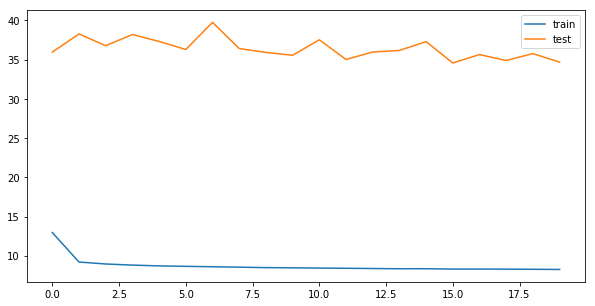

192299/192299 [==============================] - 20s 101us/step


2018-10-17 16:40:42,777 - wp - INFO - Validation Score: [34.57649889182078, 34.26585030494836, 2.725153881192796]
2018-10-17 16:40:42,777 - wp - INFO - Validation Score: [34.57649889182078, 34.26585030494836, 2.725153881192796]
2018-10-17 16:40:42,777 - wp - INFO - Validation Score: [34.57649889182078, 34.26585030494836, 2.725153881192796]


In [34]:

keras_multinput.proces_categorical_columns(df)
X_train, ts_train, y_train, X_valid, ts_valid, y_valid = keras_multinput.load_pickled_data()
logger.info(X_train.head())
keras_multinput.model_setup()
keras_multinput.fit_data(show_figures=True)


In [5]:
print(df.head())

                          LCLid  energy_median  energy_mean  energy_max  \
index     day                                                             
MAC000002 2012-10-12  MAC000002         0.1385     0.154304       0.886   
          2012-10-13  MAC000002         0.1800     0.230979       0.933   
          2012-10-14  MAC000002         0.1580     0.275479       1.085   
          2012-10-15  MAC000002         0.1310     0.213688       1.164   
          2012-10-16  MAC000002         0.1450     0.203521       0.991   

                      energy_std  energy_sum  energy_min  energy_skewness  \
index     day                                                               
MAC000002 2012-10-12    0.196034       7.098       0.000         1.870551   
          2012-10-13    0.192329      11.087       0.076         2.913198   
          2012-10-14    0.274647      13.223       0.070         1.727139   
          2012-10-15    0.224483      10.257       0.070         3.059318   
          20

In [8]:
print(df.columns)

Index(['LCLid', 'energy_median', 'energy_mean', 'energy_max', 'energy_std',
       'energy_sum', 'energy_min', 'energy_skewness', 'energy_kurtosis',
       'energey_max_usage_hour', 'stdorToU', 'Acorn', 'Acorn_grouped',
       'temperatureMax', 'windBearing', 'icon', 'dewPoint', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin',
       'temperatureHigh', 'summary', 'apparentTemperatureMin', 'moonPhase',
       'temperature_skewness', 'temperature_kurtosis', 'day_length',
       'day.of.week', 'Type', 'before_holiday', 'after_holiday', 'month',
       'year', 'temperatureMaxHour', 'temperatureMinHour',
       'apparentTemperatureMinHour', 'apparentTemperatureHighHour',
       'sunsetHour', 'uvIndexHour', 'sunriseHour', 'temperatureHighHour',
       'temperatureLowHour', 'apparentTemperatureMaxHour',
       'apparen

In [9]:
columns_drop = ['energy_median', 'energy_mean', 'energy_max', 'energy_std','energy_min', 'energy_skewness', 'energy_kurtosis',
       'energey_max_usage_hour']

In [10]:
new_df = df.drop(columns_drop, axis = 1)

In [11]:
print(new_df.head())

                          LCLid  energy_sum stdorToU    Acorn Acorn_grouped  \
index     day                                                                 
MAC000002 2012-10-12  MAC000002       7.098      Std  ACORN-A      Affluent   
          2012-10-13  MAC000002      11.087      Std  ACORN-A      Affluent   
          2012-10-14  MAC000002      13.223      Std  ACORN-A      Affluent   
          2012-10-15  MAC000002      10.257      Std  ACORN-A      Affluent   
          2012-10-16  MAC000002       9.769      Std  ACORN-A      Affluent   

                      temperatureMax  windBearing               icon  \
index     day                                                          
MAC000002 2012-10-12           11.53        252.0  partly-cloudy-day   
          2012-10-13           12.32        300.0  partly-cloudy-day   
          2012-10-14           13.03        220.0  partly-cloudy-day   
          2012-10-15           14.74        226.0               wind   
          2012

In [16]:

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

ImportError: cannot import name 'Adam'